<center>Tópicos selectos de análisis de datos<center>
<center>Tarea 4<center>
<center>Para entregar el 22 de octubre de 2020<center>

## Alumno: Marcelo Alberto Sanchez Zaragoza.

Instrucciones: 
- Entrega un solo jupyter notebook por tarea. Incluye cualquier archivo, imágen, datos, etcétera, para que pueda ejecutarse. Si lo crees conveniente, puedes usar latex para los ejercicios que lo requieran.

- Usa python 3.x y tensorflow 2.x

- Todos tus archivos DEBES nombrarlos con el siguiente formato: TareaXXX_Nombre_Apellido.ipynb, TareaXXX_Nombre_Apellido.pdf, TareaXXX_Nombre_Apellido.csv, etcétera.

- Crea una carpeta con nombre TareaXXX_Nombre_Apellido donde incluirás todos tus archivos, y entrega UN SOLO archivo ZIP usando el mismo formato para el nombre: TareaXXX_Nombre_Apellido.zip

- LAS TAREAS SON INDIVIDUALES, a menos que se especifique lo contrario

# Ejercicio 1

In [2]:
### En la siguiente linea de código hay que prestar atención cuando se corra
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


1. ¿Qué es Batch normalization? Escribe un reporte breve explicando qué es, para qué sirve y cómo se realiza. Incluye ejemplos ilustrativos (sencillos).

#### Batch Normalization
Cuando normalizamos los datos al principio, solo la capa de entrada se beneficia de esto y conforme los datos pasan por otras capas ocultas esta normalización se va perdiendo y si la red neuronal tiene muchas capas podemos tener problemas con el entrenamiento. El método de batch normalization normaliza los datos antes de que pasen por la función de activación de cada capa de la red neuronal, de esta manera tendremos los datos normalizados.

La expresión para estandarizar cada uno de los datos de cada minibatch es la siguiente:

$Z^i_{nom} = \frac{z^i-\mu}{\sigma}$

A continuación se muestra un pequeño ejemplo, el código fue proporcionado por el profesor en una de las clases, lo unico que se realizo fue agregar la parte correspondiente a batch normalization.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
from keras import models
import numpy as np
from keras import optimizers
from tensorflow.keras.utils import to_categorical
import time

### Caso 1: Agregamos Batch Normalization.

In [ ]:
## descargamos los datos con los que vamos a trabajar
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels) 

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#del cnn1
cnn1 = models.Sequential()
# extraccion caracteristicas
cnn1.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn1.add(layers.MaxPooling2D(pool_size = (2, 2)))
cnn1.add(keras.layers.BatchNormalization()) ### agregamos la normalizacion
cnn1.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))
cnn1.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn1.add(keras.layers.BatchNormalization()) ### agregamos la normalizacion
cnn1.add(layers.Conv2D(filters= 64, kernel_size=(3, 3), activation='relu'))
# capa densa
cnn1.add(layers.Flatten())
cnn1.add(layers.Dense(units= 64, activation='relu'))
cnn1.add(keras.layers.BatchNormalization()) ### agregamos la normalizacion
cnn1.add(layers.Dense(units=10, activation='softmax'))
cnn1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 13, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 5, 64)          256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [ ]:
cnn1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

tic=time.time()
history = cnn1.fit(train_images, train_labels, validation_split=0.0, epochs=5, batch_size=64)
print('Procesamiento: ', time.time()-tic,' seg')

Epoch 1/5
938/938 [==============================] - 21s 5ms/step - loss: 0.0918 - accuracy: 0.9736
Epoch 2/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0330 - accuracy: 0.9897
Epoch 3/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0244 - accuracy: 0.9923
Epoch 4/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0178 - accuracy: 0.9949
Epoch 5/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0137 - accuracy: 0.9955
Procesamiento:  39.4376494884491  seg


##### Compara su desempeño en la precisión de prueba

In [ ]:
test_loss, test_acc = cnn1.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0280 - accuracy: 0.9910
test_acc: 0.9909999966621399


### Caso 2: Sin Batch Normalization.

In [ ]:
#del cnn1
cnn1 = models.Sequential()
# extraccion caracteristicas
cnn1.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn1.add(layers.MaxPooling2D(pool_size = (2, 2)))
cnn1.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))
cnn1.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn1.add(layers.Conv2D(filters= 64, kernel_size=(3, 3), activation='relu'))
# capa densa
cnn1.add(layers.Flatten())
cnn1.add(layers.Dense(units= 64, activation='relu'))
cnn1.add(layers.Dense(units=10, activation='softmax'))
cnn1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [ ]:
cnn1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

tic=time.time()
history = cnn1.fit(train_images, train_labels, validation_split=0.0, epochs=5, batch_size=64)
print('Procesamiento: ', time.time()-tic,' seg')

Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1641 - accuracy: 0.9490
Epoch 2/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0472 - accuracy: 0.9853
Epoch 3/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0330 - accuracy: 0.9898
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0245 - accuracy: 0.9923
Epoch 5/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0198 - accuracy: 0.9939
Procesamiento:  18.309235095977783  seg


##### Compara su desempeño en la precisión de prueba

In [ ]:
test_loss, test_acc = cnn1.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0404 - accuracy: 0.9892
test_acc: 0.9891999959945679


#### Observaciones:
Observando los resultados hay una diferencia en cuanto al tiempo que cada modelo tardo en entrenar, hay que tomar en cuenta que lo que estamos estandarizando en cada una de las capas por lo que este procedimiento puede tomar cierto tiempo.


El valor de accuracy para el modelo sin batch normalization fue menor al que nos regreso ocupando batch normalization, este resultado nos ayuda como ejemplo a mostrar la razón de ocupar batch normalization, los resultados al ocupar batch normalization fueron de 0.9909, mientras para el caso donde no se ocupo fue de 0.9892.

# Ejercicio 2

2. Dados los siguientes parámetros para algún eje (canal) de un tensor:

- $i$: tamaño de los datos de entrada (cuadradas: $i_1=i_2=i$) 
- $k$: tamaño de un kernel de convolución cuadrado
- $s$: tamaño de stride (igual en ambas direcciones)
- $p$: zero padding (igual en ambas direcciones)

obtén una expresión para calcular:

    a) el tamaño de salida del mapeo luego de realizar una convolución.
    b) el tamaño de salida del proceso de pooling

### Inciso a)
El tamaño de salida del mapeo luego de realizar la convolución se puede encontrar con la siguiente expresión: 

$~~~~~~~~~~~~~~~~~~TM = \frac{(i - k + 2p)}{s} + 1$

Donde observamos que la expresión es resultado de dado el tamaño de la imagen($i$), se le resta el tamaño del kernel($k$), se suma el valor del padding($p$) dos veces ya que se cuenta dos veces porque se agrega en ambos lados de la imagen, lo dividimos entre el tamaño de stride($s$) ya que es el número de veces que el kernel entre en la imagen dado el stride y finalmente le sumamos un uno.

### Inciso b)
Para el caso del proceso de pooling tenemos casi la misma expresión pero hay un cambio importante, dado que solo nos interesa los pixeles que resultaron de la convolución no tomamos en cuenta el parámetro padding($p$), ese nos ayuda en el proceso de convolución pero en este proceso no ya que lo que se desea es reducir el tamaño de la transformación, la expresión queda de la siguiente forma:

$~~~~~~~~~~~~~~~~~~TP = \frac{(i - k)}{s} + 1$

# Ejercicio 3

3. En el archivo `wildlife.tar.gz`, se encuentra un conjunto pequeño de imágenes de distintos animales salvajes, con la siguiente distribución;

In [4]:
import os
import cv2
import numpy as np
import pandas as pd
import warnings
from matplotlib import pyplot as plt

%matplotlib inline
warnings.filterwarnings("ignore")
# observa cual es mi directorio...
os.chdir('/content/drive/MyDrive/Tarea4-CDII/')
#os.chdir('/home/victor/cursos/optativa2021/')

# ya esta descomprimido, y guardado con esta estructura de directorio
#data_set = 'data/images_wildlife/wildlife'
data_set = 'data/images_wildlife/wildlife'

labels = os.listdir(data_set)
print("Categorias:", len(labels))

total = 0
for lb in os.scandir(data_set):
    print('folder {}: imagenes {}'.format(lb.name, len(os.listdir(lb))))
    total += len(os.listdir(lb))
print('Total de imagenes:', total)


Categorias: 20
folder coyote: imagenes 736
folder bobcat: imagenes 696
folder columbian_black-tailed_deer: imagenes 735
folder cougar: imagenes 680
folder bald_eagle: imagenes 748
folder black_bear: imagenes 718
folder canada_lynx: imagenes 717
folder deer: imagenes 764
folder elk: imagenes 660
folder gray_fox: imagenes 675
folder red_fox: imagenes 759
folder sea_lions: imagenes 726
folder raven: imagenes 656
folder seals: imagenes 698
folder gray_wolf: imagenes 730
folder raccoon: imagenes 728
folder virginia_opossum: imagenes 728
folder nutria: imagenes 701
folder ringtail: imagenes 588
folder mountain_beaver: imagenes 577
Total de imagenes: 14020


De las 20 etiquetas, nos enfocaremos en 5 de ellas: `deer`, `red fox`, `bald eagle`, `gray wolf` y `coyote`. Para facilitarte el ejercicio, he preparado dos archivos con los datos de las imágenes de éstas 5 categorias. En  `imagenes_info_train.csv` e `imagenes_info_test.csv`, se encuentra la información de las imágenes de entrenamiento y prueba, respectívamente. En cada uno, encontrarás el nombre de la imagen y su categoría correspondiente. Una muestra de las imágenes de entrenamiento es la siguiente.

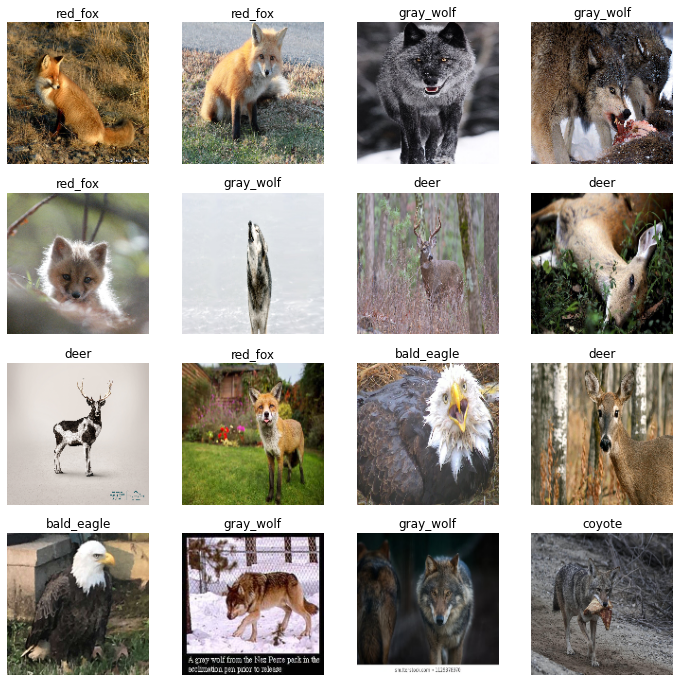

In [5]:
def plot_sample(imgs_set, labels_set, img_size=(12,12), columns=4, rows=4, random=False):
    """
    Plot a sample of images
    """
 
    fig=plt.figure(figsize=img_size)    
    for i in range(1, columns*rows + 1):        
        if random:
            img_x = np.random.randint(0, len(imgs_set))
        else:
            img_x = i-1

        img = imgs_set[img_x]
        ax = fig.add_subplot(rows, columns, i)
        ax.set_title(str(labels_set[img_x]))
        plt.axis('off')
        im = cv2.imread(img)
        im_resized = cv2.resize(im, (150, 150), interpolation=cv2.INTER_LINEAR)
        plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
        #plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

traindf=pd.read_csv('data/images_wildlife/imagenes_info_train.csv',dtype=str)
testdf=pd.read_csv('data/images_wildlife/imagenes_info_test.csv',dtype=str)

## grafica algunas imagenes de prueba
plot_sample(traindf.iloc[:,0],traindf.iloc[:,1],random=True)
   

En la siguiente celda, verás la implementación y resultados de un modelo 'simple'

In [ ]:
# data generators
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
import time
from keras.preprocessing import image


minibatch_size = 20
n_classes = 5
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.2)

# funcion para verificar el tiempo transcurrido
def elapsed(start):
    # Returns elapsed time in hh:mm:ss format from start time in unix format
    elapsed = time.time()-start
    return time.strftime("%H:%M:%S", time.gmtime(elapsed))

train_generator=datagen.flow_from_dataframe(
        dataframe=traindf,
        x_col="filename",
        y_col="label",
        subset="training",
        batch_size=minibatch_size,
        seed=42,
        shuffle=True,
        class_mode="categorical",
        target_size=(150,150))

valid_generator=datagen.flow_from_dataframe(
        dataframe=traindf,
        x_col="filename",
        y_col="label",
        subset="validation",
        batch_size=minibatch_size,
        seed=42,
        shuffle=True,
        class_mode="categorical",
        target_size=(150,150))

test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(
    dataframe=testdf,
    x_col="filename",
    y_col='label',
    batch_size=minibatch_size,
    seed=42,
    shuffle=False,
    class_mode='categorical',
    target_size=(150,150))

Found 2536 validated image filenames belonging to 5 classes.
Found 634 validated image filenames belonging to 5 classes.
Found 560 validated image filenames belonging to 5 classes.


In [ ]:
############# intentamos generar más datos como lo hizo el profesor ########################
############################################################################################
############################################################################################
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
import time
from keras.preprocessing import image

minibatch_size = 20
n_classes = 5

train_datagen = ImageDataGenerator(
    validation_split=0.2,
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)


train_generator = train_datagen.flow_from_dataframe(
        dataframe=traindf,
        x_col="filename",
        y_col="label",
        subset="training",
        batch_size=minibatch_size,
        seed=42,
        shuffle=True,
        class_mode="categorical",
        target_size=(150,150))

valid_generator = train_datagen.flow_from_dataframe(
        dataframe=traindf,
        x_col="filename",
        y_col="label",
        subset="validation",
        batch_size=minibatch_size,
        seed=42,
        shuffle=True,
        class_mode="categorical",
        target_size=(150,150))

test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(
    dataframe=testdf,
    x_col="filename",
    y_col='label',
    batch_size=minibatch_size,
    seed=42,
    shuffle=False,
    class_mode='categorical',
    target_size=(150,150))



Found 2536 validated image filenames belonging to 5 classes.
Found 634 validated image filenames belonging to 5 classes.
Found 560 validated image filenames belonging to 5 classes.


In [ ]:
# un modelo 'simple'
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu')) 
model.add(layers.Dense(n_classes, activation='softmax'))
model.summary()

model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), 
              loss='binary_crossentropy',  metrics=['acc'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
start = time.time()
history = model.fit(
      train_generator,
      validation_data = valid_generator,
      steps_per_epoch = 100, #int(len(traindf) / minibatch_size),
      validation_steps= 30, #int(int(len(traindf)*.2)/minibatch_size),
      initial_epoch = 0,
      epochs=50,
      verbose = 1)
print('\nElapsed time: {}'.format(elapsed(start)))

Epoch 1/50
100/100 [==============================] - 46s 459ms/step - loss: 1.0276 - accuracy: 0.5802 - val_loss: 5.4920 - val_accuracy: 0.0000e+00
Epoch 2/50
100/100 [==============================] - 49s 488ms/step - loss: 0.9165 - accuracy: 0.6155 - val_loss: 5.0898 - val_accuracy: 0.0000e+00
Epoch 3/50
100/100 [==============================] - 49s 490ms/step - loss: 0.8500 - accuracy: 0.6593 - val_loss: 5.9652 - val_accuracy: 0.0000e+00
Epoch 4/50
100/100 [==============================] - 49s 488ms/step - loss: 0.8023 - accuracy: 0.6703 - val_loss: 5.0627 - val_accuracy: 0.0000e+00
Epoch 5/50
100/100 [==============================] - 48s 485ms/step - loss: 0.7656 - accuracy: 0.6835 - val_loss: 4.6343 - val_accuracy: 0.0000e+00
Epoch 6/50
100/100 [==============================] - 51s 506ms/step - loss: 0.7234 - accuracy: 0.7139 - val_loss: 5.2521 - val_accuracy: 0.0000e+00
Epoch 7/50
100/100 [==============================] - 50s 502ms/step - loss: 0.6875 - accuracy: 0.7285 - v

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


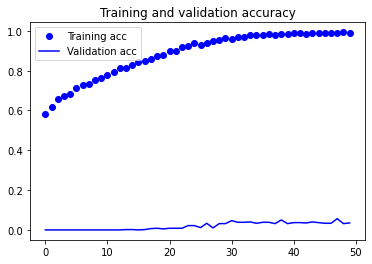

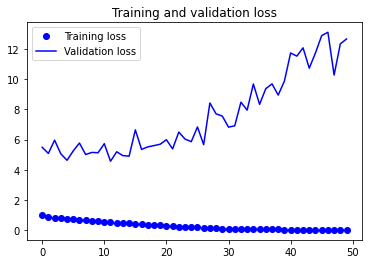

In [ ]:
model.save('data/images_wildlife/model_baseline1.h5')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)

28/28 [==============================] - 7s 264ms/step - loss: 3.0223 - accuracy: 0.7589
test acc: 0.7589285969734192


a) Toma el resultado anterior como tu Baseline. El objetivo es superar ése baseline. Para esto, aplica TODO lo que has aprendido hasta ahora, buscando un modelo que tenga un buen error de generalización y una buena precisión (al menos, mejor que tu baseline). Para esto, usa Transfer Learning con algún modelo pre-entrenado de Keras (VGG16, VGG19, Xception, InceptionV3, ResNet50, MobileNet, etc), así como los métodos de regularización que conoces.

    Explica todos los pasos y detalles de tu arquitectura.
    EL MODELO GANADOR, TENDRÁ UNA BUENA RECOMPENSA --- UN AUTOOO

In [4]:
from google.colab import drive #####no correr
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
from google.colab import drive### no correr
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [10]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


En la siguiente linea de código se agrega ciertas variaciones a los datos, tales como una rotación, zoom, etc. Lo anterior con se realiza con la intención de mejorar los resultados de nuestros resultados.

In [9]:
############# intentamos generar más datos como lo hizo el profesor ########################
############################################################################################

from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
import time
from keras.preprocessing import image

minibatch_size = 20
n_classes = 5

traindf = traindf.sample(frac=1, random_state=0).reset_index(drop=True)

train_datagen = ImageDataGenerator(
    validation_split=0.2,
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    #zoom_range=0.2,
    horizontal_flip=True,)


train_generator = train_datagen.flow_from_dataframe(
        dataframe=traindf,
        x_col="filename",
        y_col="label",
        subset="training",
        batch_size=minibatch_size,
        seed=42,
        shuffle=True,
        class_mode="categorical",
        target_size=(150,150))

valid_generator = train_datagen.flow_from_dataframe(
        dataframe=traindf,
        x_col="filename",
        y_col="label",
        subset="validation",
        batch_size=minibatch_size,
        seed=42,
        shuffle=True,
        class_mode="categorical",
        target_size=(150,150))

test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(
    dataframe=testdf,
    x_col="filename",
    y_col='label',
    batch_size=minibatch_size,
    seed=42,
    shuffle=False,
    class_mode='categorical',
    target_size=(150,150))

Found 2536 validated image filenames belonging to 5 classes.
Found 634 validated image filenames belonging to 5 classes.
Found 560 validated image filenames belonging to 5 classes.


In [12]:
##### Cargamos los modelos que ocupamos
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg19 import VGG19
from keras.applications.xception import Xception
from keras.applications.inception_v3 import InceptionV3
#from keras.applications.resnet50  import ResNet50


conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

conv_base2 = MobileNet(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

conv_base3 = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

conv_base4 = Xception(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

conv_base5 = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58900480/58889256 [==============================] - 1s 0us/step


87924736/87910968 [==============================] - 1s 0us/step


### comenzamos con algunos modelos y mostramos los resultados de cada uno de ellos con el conjunto de prueba.

In [ ]:
model = models.Sequential()
model.add(conv_base) #VGG16
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 1285      
Total params: 16,813,381
Trainable params: 16,813,381
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='binary_crossentropy',  metrics=['acc'])
history = model.fit(
      train_generator,
      validation_data = valid_generator,
      steps_per_epoch = 100, #int(len(traindf) / minibatch_size),
      validation_steps= 30, #int(int(len(traindf)*.2)/minibatch_size),
      initial_epoch = 0,
      epochs=30)
#print('\nElapsed time: {}'.format(elapsed(start)))

Epoch 1/30
100/100 [==============================] - 340s 3s/step - loss: 0.4492 - acc: 0.4374 - val_loss: 0.8823 - val_acc: 0.0000e+00
Epoch 2/30
100/100 [==============================] - 108s 1s/step - loss: 0.3104 - acc: 0.6293 - val_loss: 1.0183 - val_acc: 0.0000e+00
Epoch 3/30
100/100 [==============================] - 84s 833ms/step - loss: 0.2377 - acc: 0.7415 - val_loss: 1.0872 - val_acc: 0.0000e+00
Epoch 4/30
100/100 [==============================] - 79s 790ms/step - loss: 0.1909 - acc: 0.8025 - val_loss: 1.3056 - val_acc: 0.0000e+00
Epoch 5/30
100/100 [==============================] - 79s 794ms/step - loss: 0.1638 - acc: 0.8532 - val_loss: 1.1691 - val_acc: 0.0000e+00
Epoch 6/30
100/100 [==============================] - 78s 772ms/step - loss: 0.1388 - acc: 0.8687 - val_loss: 1.1597 - val_acc: 0.0000e+00
Epoch 7/30
100/100 [==============================] - 78s 784ms/step - loss: 0.1155 - acc: 0.8948 - val_loss: 1.3105 - val_acc: 0.0000e+00
Epoch 8/30
100/100 [===========

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


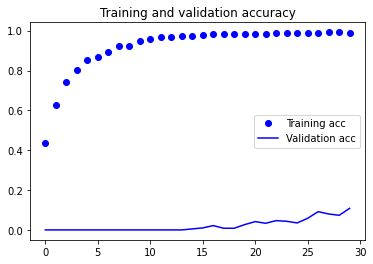

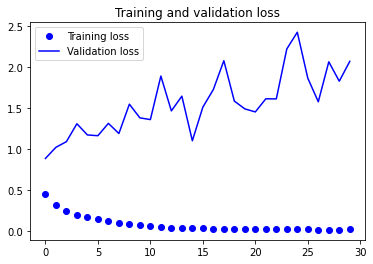

In [ ]:
#model.save('data/images_wildlife/model_baseline1.h5')
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)

28/28 [==============================] - 110s 4s/step - loss: 0.4865 - acc: 0.7750
test acc: 0.7749999761581421


### Realizamos un segundo modelo

In [ ]:
## Realizamos un segundo modelo
model = models.Sequential()
model.add(conv_base2) #mobilenet
model.add(layers.Flatten())
model.add(layers.Dense(206, activation='relu'))
model.add(keras.layers.BatchNormalization()) ### agregamos la normalizacion
model.add(layers.Dense(206, activation='relu'))
model.add(keras.layers.BatchNormalization()) ### agregamos la normalizacion
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 4, 4, 1024)        3228864   
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 206)               3375310   
_________________________________________________________________
batch_normalization_296 (Bat (None, 206)               824       
_________________________________________________________________
dense_4 (Dense)              (None, 206)               42642     
_________________________________________________________________
batch_normalization_297 (Bat (None, 206)               824       
_________________________________________________________________
dense_5 (Dense)              (None, 5)                

In [ ]:
################ MODELO 2 ##############
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='binary_crossentropy',  metrics=['acc'])
history = model.fit(
      train_generator,
      validation_data = valid_generator,
      steps_per_epoch = 100, #int(len(traindf) / minibatch_size),
      validation_steps= 30, #int(int(len(traindf)*.2)/minibatch_size),
      initial_epoch = 0,
      epochs=30)
#print('\nElapsed time: {}'.format(elapsed(start)))

Epoch 1/30
100/100 [==============================] - 227s 2s/step - loss: 0.6565 - acc: 0.5730 - val_loss: 0.8181 - val_acc: 0.2533
Epoch 2/30
100/100 [==============================] - 215s 2s/step - loss: 0.4681 - acc: 0.8337 - val_loss: 0.8414 - val_acc: 0.1600
Epoch 3/30
100/100 [==============================] - 240s 2s/step - loss: 0.3878 - acc: 0.8998 - val_loss: 0.7959 - val_acc: 0.1817
Epoch 4/30
100/100 [==============================] - 220s 2s/step - loss: 0.3355 - acc: 0.9319 - val_loss: 0.7912 - val_acc: 0.1683
Epoch 5/30
100/100 [==============================] - 217s 2s/step - loss: 0.3030 - acc: 0.9484 - val_loss: 0.7327 - val_acc: 0.1967
Epoch 6/30
100/100 [==============================] - 218s 2s/step - loss: 0.2706 - acc: 0.9584 - val_loss: 0.7258 - val_acc: 0.2250
Epoch 7/30
100/100 [==============================] - 222s 2s/step - loss: 0.2434 - acc: 0.9755 - val_loss: 0.7056 - val_acc: 0.2217
Epoch 8/30
100/100 [==============================] - 217s 2s/step - 

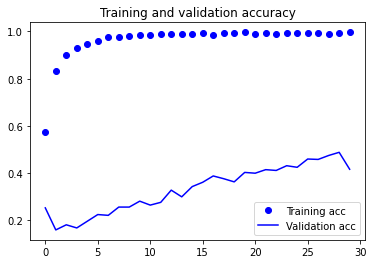

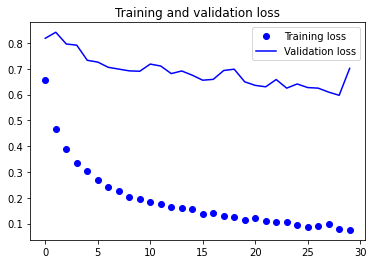

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)

28/28 [==============================] - 22s 766ms/step - loss: 0.2176 - acc: 0.8589
test acc: 0.8589285612106323


#### Agremos una extructura nueva al segundo modelo, esperando que sea mejor

In [ ]:
## Realizamos un segundo modelo
model = models.Sequential()
model.add(conv_base2) #mobilenet
model.add(layers.Flatten())

model.add(layers.Dense(206, activation='relu'))
model.add(keras.layers.BatchNormalization()) ### agregamos la normalizacion

model.add(layers.Dense(412, activation='relu'))
model.add(keras.layers.BatchNormalization()) ### agregamos la normalizacion

model.add(layers.Dense(206, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization()) ### agregamos la normalizacion

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 4, 4, 1024)        3228864   
_________________________________________________________________
flatten_11 (Flatten)         (None, 16384)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 206)               3375310   
_________________________________________________________________
batch_normalization_308 (Bat (None, 206)               824       
_________________________________________________________________
dense_20 (Dense)             (None, 412)               85284     
_________________________________________________________________
batch_normalization_309 (Bat (None, 412)               1648      
_________________________________________________________________
dense_21 (Dense)             (None, 206)             

In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='binary_crossentropy',  metrics=['acc'])
history = model.fit(
      train_generator,
      workers=8,
      validation_data = valid_generator,
      steps_per_epoch = 100, #int(len(traindf) / minibatch_size),
      validation_steps= 30, #int(int(len(traindf)*.2)/minibatch_size),
      initial_epoch = 0,
      epochs=10)

Epoch 1/10
100/100 [==============================] - 232s 2s/step - loss: 0.5126 - acc: 0.6082 - val_loss: 0.6748 - val_acc: 0.0433
Epoch 2/10
100/100 [==============================] - 225s 2s/step - loss: 0.2824 - acc: 0.9188 - val_loss: 0.7152 - val_acc: 0.0083
Epoch 3/10
100/100 [==============================] - 227s 2s/step - loss: 0.1460 - acc: 0.9674 - val_loss: 0.7620 - val_acc: 0.0117
Epoch 4/10
100/100 [==============================] - 229s 2s/step - loss: 0.0793 - acc: 0.9744 - val_loss: 0.8289 - val_acc: 0.0183
Epoch 5/10
100/100 [==============================] - 224s 2s/step - loss: 0.0483 - acc: 0.9810 - val_loss: 0.8594 - val_acc: 0.0167
Epoch 6/10
100/100 [==============================] - 226s 2s/step - loss: 0.0318 - acc: 0.9850 - val_loss: 0.8973 - val_acc: 0.0200
Epoch 7/10
100/100 [==============================] - 225s 2s/step - loss: 0.0229 - acc: 0.9870 - val_loss: 0.9228 - val_acc: 0.0333
Epoch 8/10
100/100 [==============================] - 226s 2s/step - 

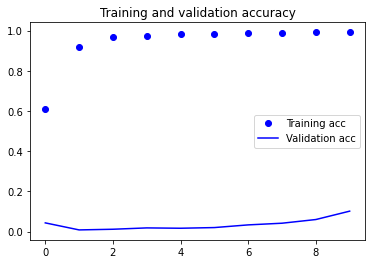

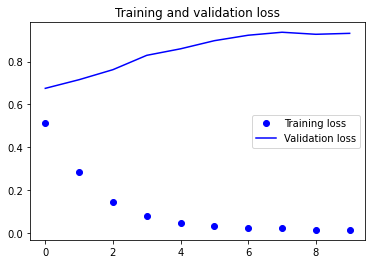

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)

28/28 [==============================] - 22s 767ms/step - loss: 0.2140 - acc: 0.7982
test acc: 0.7982142567634583


### Realizamos un tercer modelo

In [ ]:
########### Realizamos un tercer modelo
###############################################################################
###############################################################################
################ modelo con accuracy de 0.90 en el conjunto de prueba
model = models.Sequential()
model.add(conv_base4) #Xception
model.add(layers.Flatten())
model.add(layers.Dense(103, activation='relu'))
model.add(keras.layers.BatchNormalization()) ### agregamos la normalizacion
model.add(layers.Dense(103, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization()) ### agregamos la normalizacion
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 103)               5273703   
_________________________________________________________________
batch_normalization_98 (Batc (None, 103)               412       
_________________________________________________________________
dense_1 (Dense)              (None, 103)               10712     
_________________________________________________________________
batch_normalization_99 (Batc (None, 103)               412       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 5

In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4), loss='binary_crossentropy',  metrics=['acc'])

history = model.fit(
      train_generator,
      workers=8,
      validation_data = valid_generator,
      steps_per_epoch = 100, #int(len(traindf) / minibatch_size),
      validation_steps= 30, #int(int(len(traindf)*.2)/minibatch_size),
      initial_epoch = 0,
      epochs=20)

Epoch 1/20
100/100 [==============================] - 156s 1s/step - loss: 0.5147 - acc: 0.6859 - val_loss: 0.8997 - val_acc: 0.0850
Epoch 2/20
100/100 [==============================] - 83s 791ms/step - loss: 0.3414 - acc: 0.8477 - val_loss: 1.0486 - val_acc: 0.0283
Epoch 3/20
100/100 [==============================] - 81s 762ms/step - loss: 0.2817 - acc: 0.8870 - val_loss: 0.8362 - val_acc: 0.2383
Epoch 4/20
100/100 [==============================] - 80s 754ms/step - loss: 0.2489 - acc: 0.9088 - val_loss: 0.8174 - val_acc: 0.2467
Epoch 5/20
100/100 [==============================] - 80s 780ms/step - loss: 0.2143 - acc: 0.9243 - val_loss: 0.8516 - val_acc: 0.2850
Epoch 6/20
100/100 [==============================] - 79s 766ms/step - loss: 0.1945 - acc: 0.9309 - val_loss: 0.7936 - val_acc: 0.2833
Epoch 7/20
100/100 [==============================] - 82s 762ms/step - loss: 0.1769 - acc: 0.9379 - val_loss: 0.5629 - val_acc: 0.4967
Epoch 8/20
100/100 [==============================] - 82s

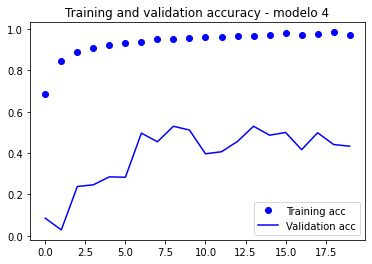

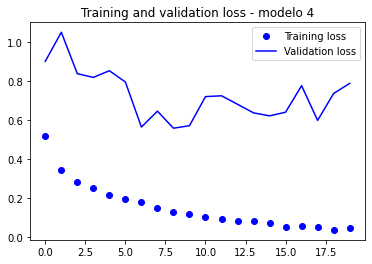

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy - modelo 4')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss - modelo 4')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)################# el mejor valor hasta ahorita, 18/10/2021
######################## 

28/28 [==============================] - 102s 4s/step - loss: 0.1564 - acc: 0.9054
test acc: 0.9053571224212646


### Realizamos un quinto modelo

In [ ]:
####################### Realizamos un quinto modelo
model = models.Sequential()
model.add(conv_base4) #Xception
model.add(layers.Flatten())

model.add(layers.Dense(103, activation='relu'))
model.add(keras.layers.BatchNormalization()) ### agregamos la normalizacion

model.add(layers.Dense(206, activation='sigmoid'))
model.add(keras.layers.BatchNormalization()) ### agregamos la normalizacion

model.add(layers.Dense(103, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization()) ### agregamos la normalizacion

model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 103)               5273703   
_________________________________________________________________
batch_normalization_98 (Batc (None, 103)               412       
_________________________________________________________________
dense_1 (Dense)              (None, 206)               21424     
_________________________________________________________________
batch_normalization_99 (Batc (None, 206)               824       
_________________________________________________________________
dense_2 (Dense)              (None, 103)               2

In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='binary_crossentropy',  metrics=['acc'])
history = model.fit(
      train_generator,
      workers=8,
      validation_data = valid_generator,
      steps_per_epoch = 100, #int(len(traindf) / minibatch_size),
      validation_steps= 30, #int(int(len(traindf)*.2)/minibatch_size),
      initial_epoch = 0,
      epochs=30)

Epoch 1/30
100/100 [==============================] - 95s 817ms/step - loss: 0.3452 - acc: 0.8567 - val_loss: 0.6792 - val_acc: 0.1717
Epoch 2/30
100/100 [==============================] - 83s 804ms/step - loss: 0.3393 - acc: 0.8567 - val_loss: 0.6440 - val_acc: 0.1833
Epoch 3/30
100/100 [==============================] - 83s 808ms/step - loss: 0.3009 - acc: 0.8893 - val_loss: 0.7431 - val_acc: 0.1467
Epoch 4/30
100/100 [==============================] - 83s 800ms/step - loss: 0.2917 - acc: 0.8908 - val_loss: 0.6739 - val_acc: 0.2083
Epoch 5/30
100/100 [==============================] - 83s 795ms/step - loss: 0.2842 - acc: 0.8933 - val_loss: 0.7028 - val_acc: 0.2067
Epoch 6/30
100/100 [==============================] - 81s 775ms/step - loss: 0.2736 - acc: 0.9023 - val_loss: 0.6551 - val_acc: 0.2950
Epoch 7/30
100/100 [==============================] - 82s 785ms/step - loss: 0.2653 - acc: 0.8998 - val_loss: 0.6682 - val_acc: 0.2750
Epoch 8/30
100/100 [==============================] - 8

NameError: ignored

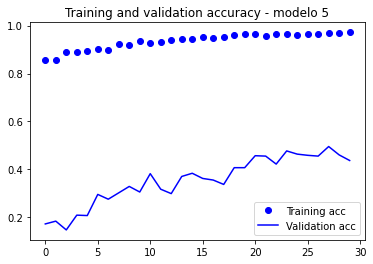

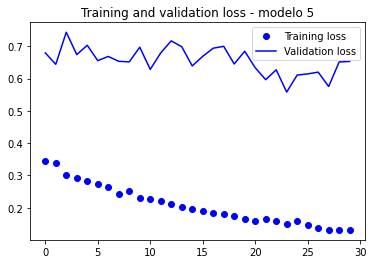

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy - modelo 5')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss - modelo 5')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)

28/28 [==============================] - 103s 4s/step - loss: 0.1823 - acc: 0.9036
test acc: 0.9035714268684387


# Analizamos nuevamente el modelo que nos dio resultados buenos con accuracy de 0.90 pero vamos a cambiar el tamaño del batch

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
########### Realizamos un modelo extra
###############################################################################
###############################################################################
################ modelo con accuracy de 0.9174 en el conjunto de prueba
model = models.Sequential()
model.add(conv_base4) #Xception
model.add(layers.Flatten())
model.add(layers.Dense(103, activation='relu'))
model.add(keras.layers.BatchNormalization()) ### agregamos la normalizacion
model.add(layers.Dense(103, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization()) ### agregamos la normalizacion
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 103)               5273703   
_________________________________________________________________
batch_normalization_98 (Batc (None, 103)               412       
_________________________________________________________________
dense_1 (Dense)              (None, 103)               10712     
_________________________________________________________________
batch_normalization_99 (Batc (None, 103)               412       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 5

In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4), loss='binary_crossentropy',  metrics=['acc'])

history = model.fit(
      train_generator,
      workers=8,
      validation_data = valid_generator,
      steps_per_epoch = int(len(traindf) / minibatch_size), #100,
      validation_steps= int(int(len(traindf)*.2)/minibatch_size), #30,
      initial_epoch = 0,
      epochs=30) # aumentar el numero de batches

Epoch 1/30
158/158 [==============================] - 264s 1s/step - loss: 0.4512 - acc: 0.7535 - val_loss: 1.0658 - val_acc: 0.1065
Epoch 2/30
158/158 [==============================] - 115s 699ms/step - loss: 0.2917 - acc: 0.8733 - val_loss: 0.7711 - val_acc: 0.2855
Epoch 3/30
158/158 [==============================] - 117s 724ms/step - loss: 0.2293 - acc: 0.9202 - val_loss: 0.8448 - val_acc: 0.2452
Epoch 4/30
158/158 [==============================] - 113s 688ms/step - loss: 0.2009 - acc: 0.9252 - val_loss: 0.7427 - val_acc: 0.3629
Epoch 5/30
158/158 [==============================] - 114s 696ms/step - loss: 0.1626 - acc: 0.9458 - val_loss: 0.7325 - val_acc: 0.3258
Epoch 6/30
158/158 [==============================] - 115s 699ms/step - loss: 0.1407 - acc: 0.9537 - val_loss: 0.6446 - val_acc: 0.4306
Epoch 7/30
158/158 [==============================] - 114s 710ms/step - loss: 0.1075 - acc: 0.9636 - val_loss: 0.5737 - val_acc: 0.4790
Epoch 8/30
158/158 [==============================]

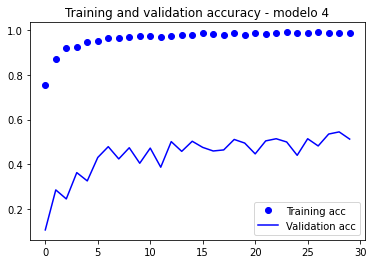

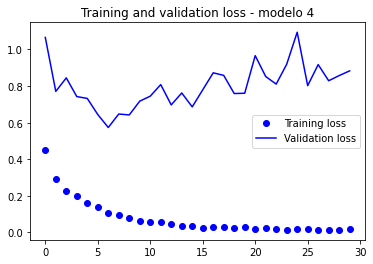

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy - modelo 4')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss - modelo 4')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)################# el mejor valor hasta ahorita, 19/10/2021
######################## Hasta las 02:10 es el mejor modelo con el accuracy de 0.9179

28/28 [==============================] - 225s 8s/step - loss: 0.1451 - acc: 0.9179
test acc: 0.9178571701049805


In [ ]:
######## Realizamos un segundo modelo
################################################################################

model = models.Sequential()
model.add(conv_base4) #mobilenet
model.add(layers.Flatten())

model.add(layers.Dense(300, activation='relu'))
model.add(keras.layers.BatchNormalization()) ### agregamos la normalizacion

model.add(layers.Dense(300, activation='relu'))
model.add(keras.layers.BatchNormalization()) ### agregamos la normalizacion

#model.add(layers.Flatten())
model.add(layers.Dense(300, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization()) ### agregamos la normalizacion

model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten_2 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 300)               15360300  
_________________________________________________________________
batch_normalization_202 (Bat (None, 300)               1200      
_________________________________________________________________
dense_9 (Dense)              (None, 300)               90300     
_________________________________________________________________
batch_normalization_203 (Bat (None, 300)               1200      
_________________________________________________________________
dense_10 (Dense)             (None, 300)              

In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4), loss='binary_crossentropy',  metrics=['acc'])

history = model.fit(
      train_generator,
      workers=8,
      validation_data = valid_generator,
      steps_per_epoch = int(len(traindf) / minibatch_size), #100,
      validation_steps= int(int(len(traindf)*.2)/minibatch_size), #30,
      initial_epoch = 0,
      epochs=30) # aumentar el numero de batches

Epoch 1/30
158/158 [==============================] - 98s 536ms/step - loss: 0.4820 - acc: 0.7094 - val_loss: 1.0710 - val_acc: 0.0581
Epoch 2/30
158/158 [==============================] - 89s 536ms/step - loss: 0.2964 - acc: 0.8590 - val_loss: 0.7731 - val_acc: 0.1371
Epoch 3/30
158/158 [==============================] - 90s 559ms/step - loss: 0.2266 - acc: 0.8902 - val_loss: 1.0378 - val_acc: 0.1097
Epoch 4/30
158/158 [==============================] - 88s 545ms/step - loss: 0.1690 - acc: 0.9183 - val_loss: 1.0485 - val_acc: 0.1032
Epoch 5/30
158/158 [==============================] - 88s 537ms/step - loss: 0.1299 - acc: 0.9328 - val_loss: 0.8267 - val_acc: 0.2242
Epoch 6/30
158/158 [==============================] - 88s 545ms/step - loss: 0.1020 - acc: 0.9471 - val_loss: 0.9788 - val_acc: 0.2468
Epoch 7/30
158/158 [==============================] - 89s 547ms/step - loss: 0.0929 - acc: 0.9429 - val_loss: 0.8592 - val_acc: 0.3048
Epoch 8/30
158/158 [==============================] - 8

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)################# el mejor valor hasta ahorita, 19/10/2021
######################## Hasta las 04:49 es el mejor modelo con el accuracy de 0.9286

28/28 [==============================] - 103s 4s/step - loss: 0.1721 - acc: 0.9286
test acc: 0.9285714030265808


In [ ]:
######## Realizamos un nuevo modelo, agregamos una nueva capa y otro optimizador
################################################################################
## Quitamos el zoom de los datos y cambiamos el optimizador, es igualito al anterior

model = models.Sequential()
model.add(conv_base4) #mobilenet
model.add(layers.Flatten())

model.add(layers.Dense(300, activation='relu'))
model.add(keras.layers.BatchNormalization()) ### agregamos la normalizacion

model.add(layers.Dense(300, activation='relu'))
model.add(keras.layers.BatchNormalization()) ### agregamos la normalizacion

#model.add(layers.Flatten())
model.add(layers.Dense(300, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization()) ### agregamos la normalizacion

model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 300)               15360300  
_________________________________________________________________
batch_normalization_98 (Batc (None, 300)               1200      
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
batch_normalization_99 (Batc (None, 300)               1200      
_________________________________________________________________
dense_2 (Dense)              (None, 300)               9

In [ ]:
model.compile(optimizer=optimizers.Adamax(learning_rate=1e-4), loss='binary_crossentropy',  metrics=['acc'])

history = model.fit(
      train_generator,
      workers=8,
      validation_data = valid_generator,
      steps_per_epoch = int(len(traindf) / minibatch_size), #100,
      validation_steps= int(int(len(traindf)*.2)/minibatch_size), #30,
      initial_epoch = 0,
      epochs=30) # aumentar el numero de batches

Epoch 1/30
158/158 [==============================] - 94s 555ms/step - loss: 0.0178 - acc: 0.9889 - val_loss: 0.7687 - val_acc: 0.5081
Epoch 2/30
158/158 [==============================] - 88s 531ms/step - loss: 0.0146 - acc: 0.9902 - val_loss: 0.8125 - val_acc: 0.4919
Epoch 3/30
158/158 [==============================] - 88s 541ms/step - loss: 0.0112 - acc: 0.9927 - val_loss: 0.7962 - val_acc: 0.4887
Epoch 4/30
158/158 [==============================] - 88s 526ms/step - loss: 0.0117 - acc: 0.9933 - val_loss: 0.7965 - val_acc: 0.5194
Epoch 5/30
158/158 [==============================] - 88s 544ms/step - loss: 0.0101 - acc: 0.9943 - val_loss: 0.7952 - val_acc: 0.5097
Epoch 6/30
158/158 [==============================] - 88s 548ms/step - loss: 0.0086 - acc: 0.9946 - val_loss: 0.7744 - val_acc: 0.5226
Epoch 7/30
158/158 [==============================] - 88s 543ms/step - loss: 0.0085 - acc: 0.9952 - val_loss: 0.7875 - val_acc: 0.5258
Epoch 8/30
158/158 [==============================] - 8

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)################# No llegamos a nada bueno :( 
######################## 

28/28 [==============================] - 12s 426ms/step - loss: 0.1587 - acc: 0.9232
test acc: 0.9232142567634583


## Tenemos dos resultados con valor de accuracy
En la siguiente linea ya realizamos el modelo final tomando en cuenta el modelo que nos dio como resultado de accuracy igual 0.9287.

In [33]:
######## Realizamos un nuevo modelo, agregamos una nueva capa y otro optimizador
################################################################################
conv_base4.trainable = False ### ----

model = models.Sequential()
model.add(conv_base4) #mobilenet
model.add(layers.Flatten())

model.add(layers.Dense(300, activation='relu'))
model.add(keras.layers.BatchNormalization()) ### agregamos la normalizacion

model.add(layers.Dense(300, activation='relu'))
model.add(keras.layers.BatchNormalization()) ### agregamos la normalizacion

#model.add(layers.Flatten())
model.add(layers.Dense(300, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization()) ### agregamos la normalizacion

model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               15360300  
_________________________________________________________________
batch_normalization_101 (Bat (None, 300)               1200      
_________________________________________________________________
dense_5 (Dense)              (None, 300)               90300     
_________________________________________________________________
batch_normalization_102 (Bat (None, 300)               1200      
_________________________________________________________________
dense_6 (Dense)              (None, 300)              

In [34]:
model.compile(optimizer=optimizers.Adamax(learning_rate=1e-4), loss='binary_crossentropy',  metrics=['acc'])

history = model.fit(
      train_generator,
      workers=8,
      validation_data = valid_generator,
      steps_per_epoch = int(len(traindf) / minibatch_size), #100,
      validation_steps= int(int(len(traindf)*.2)/minibatch_size), #30,
      initial_epoch = 0,
      epochs=30) # aumentar el numero de batches

Epoch 1/30
158/158 [==============================] - 105s 616ms/step - loss: 0.4510 - acc: 0.7373 - val_loss: 0.3327 - val_acc: 0.7984
Epoch 2/30
158/158 [==============================] - 100s 610ms/step - loss: 0.3445 - acc: 0.7982 - val_loss: 0.2870 - val_acc: 0.8210
Epoch 3/30
158/158 [==============================] - 99s 610ms/step - loss: 0.3066 - acc: 0.8200 - val_loss: 0.2578 - val_acc: 0.8161
Epoch 4/30
158/158 [==============================] - 99s 610ms/step - loss: 0.2900 - acc: 0.8242 - val_loss: 0.2709 - val_acc: 0.8113
Epoch 5/30
158/158 [==============================] - 100s 600ms/step - loss: 0.2703 - acc: 0.8312 - val_loss: 0.2404 - val_acc: 0.8323
Epoch 6/30
158/158 [==============================] - 99s 591ms/step - loss: 0.2429 - acc: 0.8425 - val_loss: 0.2356 - val_acc: 0.8452
Epoch 7/30
158/158 [==============================] - 99s 608ms/step - loss: 0.2429 - acc: 0.8384 - val_loss: 0.1930 - val_acc: 0.8661
Epoch 8/30
158/158 [==============================] 

In [35]:
test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)################# 
######################## 

28/28 [==============================] - 14s 496ms/step - loss: 0.0946 - acc: 0.9304
test acc: 0.9303571581840515


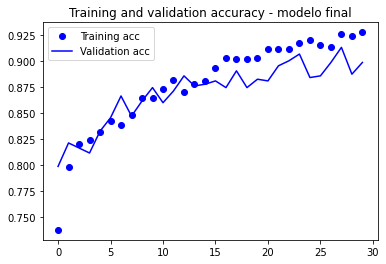

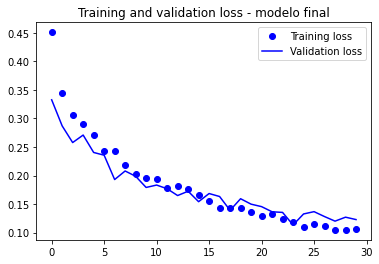

In [36]:
model.save('data/images_wildlife/model_Jordan.h5')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy - modelo final')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss - modelo final')
plt.legend()

plt.show()

In [37]:
test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)################# 
########################

28/28 [==============================] - 15s 518ms/step - loss: 0.0946 - acc: 0.9304
test acc: 0.9303571581840515


### COMENTARIOS
Se presentaron evidencias de distintos modelos que nos ayudan a encontrar el mejor accuracy para nuestro conjunto de prueba. Al final mostramos nuestro mejor modelo y su predicción la cual fue de 0.9304 con el conjunto de prueba.

En la construcción del modelo se utilizó TrasnferLearning, alguno de ellos se muestraron al principio. Entre los distintos modelos que se ocuparon están: VGG16, MobileNet, VGG19, Xception y InceptionV3. Después de colocar un modelo pre entrenado colocamos distintas capas, entre ellas una capa de aplanamiento, capas ocultas con activación relu, utilizamos batch normalization que se menciono en el ejercicio 1 y al final una capa de clasificación de 5 unidades con activación softmax. En algunos casos variamos el número de unidades pero para nuestro modelo final ocupamos un modelo pre entrenado Xception, una capa de aplanamiento, tres capas ocultas con 300 unidades cada una con función relu, cada una con batch normalization y la última capa de clasificación con 5 unidades con función de activación softmax. Al final guardamos nuestro mejor modelo.

Cabe mencionar que para nuestro conjunto de entrenamiento realizamos distintas rotaciones, acercamientos de la imagen, etc., con el fin de mejorar nuestro modelo, esta parte se agrega al iniciar el inciso a). Al igual se agrego el gráfico donde observamos que no hay un sobreajuste por parte de nuestros datos de entrenamiento.

b) Usando las capas de convolución de tu modelo, obtén las representaciones (embeddings) de las imágenes de prueba, es decir, al salir de la última capa de convolución. Obtén una visualización de éstas representaciones con algún método de reducción de dimensión (PCA, tSNE). ¿Encuentras patrones interesantes?

In [6]:
import tensorflow as tf
### cargamos nuestro modelo
model = tf.keras.models.load_model('data/images_wildlife/model_Jordan.h5') #carga el mejor modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               15360300  
_________________________________________________________________
batch_normalization_101 (Bat (None, 300)               1200      
_________________________________________________________________
dense_5 (Dense)              (None, 300)               90300     
_________________________________________________________________
batch_normalization_102 (Bat (None, 300)               1200      
_________________________________________________________________
dense_6 (Dense)              (None, 300)              

In [7]:
########## ojo cuando hagas esta parte 
### observamos que capa es la que nos piden en el ejercicio  
from tensorflow.keras.models import Model
extra = Model(model.input, model.layers[-8].output) #se quita el clasificador
extra.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception_input (InputLayer)  [(None, 150, 150, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 51200)             0         
Total params: 20,861,480
Trainable params: 0
Non-trainable params: 20,861,480
_________________________________________________________________


In [10]:
#### en la siguiente función realizamos la extraccion que nos solicitan, lo anterior fue tomado 
### de un código proporcionado por el profesor y adaptado a nuestro código
def extract_features(conv_base,generator, sample_count, h, w, ch, batch_size = 20): 
    features = np.zeros(shape=(sample_count, h* w* ch))
    labels = np.zeros(shape=(sample_count,5))
    
    i = 0
    for inputs_batch, labels_batch in generator:
        n=inputs_batch.shape[0]
        print(i* n)
        features_batch = conv_base.predict(inputs_batch) 
        features[i * n : (i + 1) * n] = features_batch
        labels[i * n : (i + 1) * n] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

#parametros
h=5
w=5
ch=2048
num_features=h*w*ch
num_classes=5
batch_size=20
trainsize=2536
validsize=634
testsize=560

#get features  test_generator
test_features, test_labels = extract_features(extra,test_generator, testsize, h,w,ch, batch_size)

#selecciona la categoria con el mayor score
def maxin(xx): 
        maxi=xx==max(xx)
        maxs=np.sum(maxi)
        if maxs==1: a=xx.argmax()
        else: a=np.random.choice(np.where(xx==max(xx))[0])
        return(int(a))

#regresa la etiqueta
def labls(indx): 
  if indx==0:
    lb='bald_eagle'
  elif indx==1:
    lb='coyote'
  elif indx==2:
    lb='deer'
  elif indx==3:
    lb='gray_wolf'
  elif indx==4:
    lb='red_fox'
  return lb   

#obtiene las etiquetas
labelsTst=[]
for i in range(test_labels.shape[0]):
  xx=test_labels[i,:]
  indx=maxin(xx)
  lab=labls(indx)
  labelsTst.append(lab)

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540


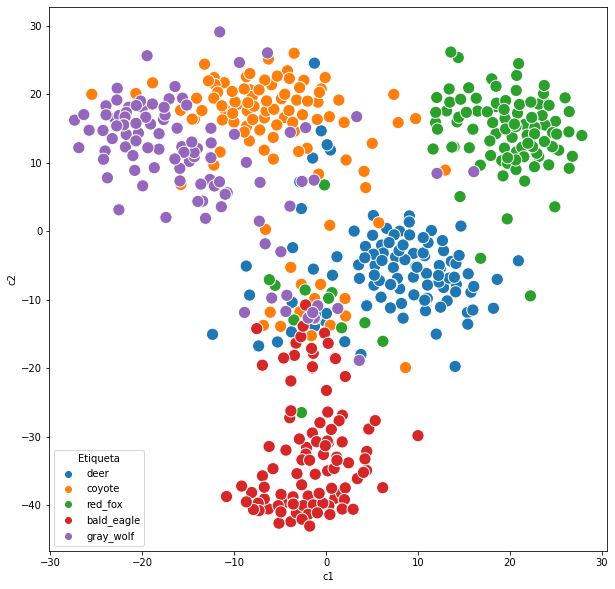

In [11]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#aplica t-SNE
tsne = TSNE(n_components=2,learning_rate=100)
X_tsne = tsne.fit_transform(test_features)


tsne_dataset = pd.DataFrame({'c1': X_tsne[:, 0], 'c2': X_tsne[:, 1], 'Etiqueta':labelsTst})




fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace = 0.5)
sns.scatterplot(x='c1', y='c2', data = tsne_dataset, hue='Etiqueta', s=150, legend = 'brief')

In [35]:
from sklearn.decomposition import PCA
pca_f=PCA(4)
data_proj = pca_f.fit_transform(test_features)
#volvemos nuestros datos en un dataframe
tabla_1 = pd.DataFrame(data_proj)

In [36]:
proy_1 = tabla_1
proy_1['Etiqueta'] = labelsTst
proy_1.columns = ['pc1','pc2','pc3','pc4','Etiqueta']
proy_1

,pc1,pc2,pc3,pc4,Etiqueta
0,9.332656,-42.144281,47.077539,32.845763,deer
1,19.787944,-28.465269,33.702166,4.488529,deer
2,19.088602,-13.978544,15.053200,10.935101,deer
3,-24.608914,-12.306957,12.725663,47.030854,deer
4,21.587249,-52.340973,54.634097,11.329931,deer
...,...,...,...,...,...
555,-47.758898,59.361821,13.076481,-49.238857,gray_wolf
556,-7.951391,10.909762,23.628520,-23.146762,gray_wolf
557,-42.153670,9.700487,1.753179,36.515284,gray_wolf
558,-38.881379,55.917791,18.689182,-60.562421,gray_wolf


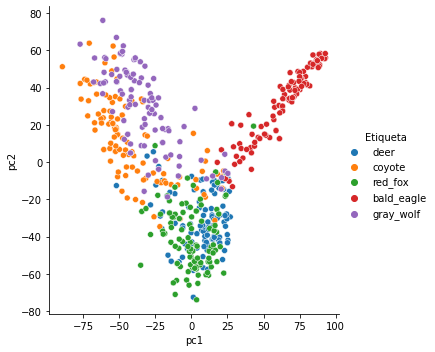

In [37]:
import seaborn as sns
#fig.add_subplot(321)
sns.relplot(x='pc1', y='pc2', hue='Etiqueta',data=proy_1)

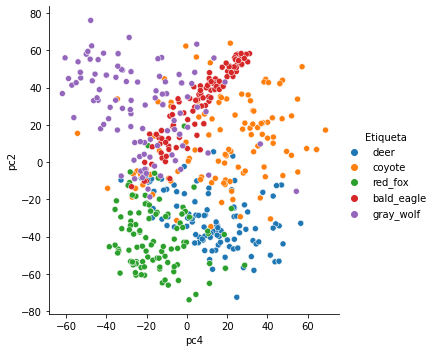

In [38]:
import seaborn as sns
#fig.add_subplot(321)
sns.relplot(x='pc4', y='pc2', hue='Etiqueta',data=proy_1)

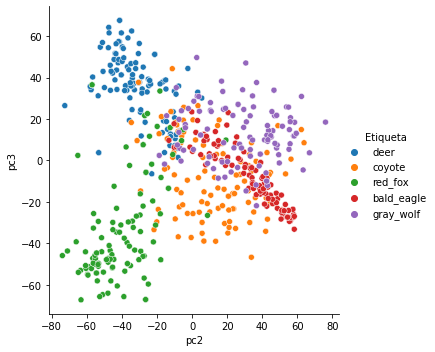

In [39]:
sns.relplot(x='pc2', y='pc3', hue='Etiqueta',data=proy_1)

### Comentarios
Se observa para el primer gráfico correspondiente a T-SNE que los conjuntos de puntos correspondientes a los distintos animales se encuentran cercanos entre ellos. Los grupos que se logran diferenciar son los de bald_eagle, red_fox y deer, este último tiene muchos puntos distribuidos en otras zonas. En general se logra ver que T-SNE intenta separar lo más que se puede los datos pero no lo logra del todo, una razón puede ser el modelo que le proporcionamos ya que quizá necesita uno con un accuracy mayor.

Para PCA se solicitaron 8 componentes principales, se muestran alguno de ellos y se observa que intenta agrupar los puntos correspondiente a cada animal en su grupo pero no lo logra del todo ya que los puntos todavía se encuentran alejados unos de otros.